In [217]:
import pandas as pd
import datetime as dt
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#ML Libraries that we will be using
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

df = pd.read_csv('df3.csv')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4452 non-null   object 
 10  production_countries  4629 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4705 non-null   object 
 15  status               

##데이터 전처리

In [218]:
#변수의 중요도 확인하기 
df = df[['budget', 'popularity', 'revenue','vote_count']]
df.corr()

,budget,popularity,revenue,vote_count
budget,1.000000,0.505414,0.730823,0.593180
popularity,0.505414,1.000000,0.644724,0.778130
revenue,0.730823,0.644724,1.000000,0.781487
vote_count,0.593180,0.778130,0.781487,1.000000


In [219]:
df.describe()

,budget,popularity,revenue,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,690.217989
std,4.072239e+07,31.816650,1.628571e+08,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,737.000000
max,3.800000e+08,875.581305,2.787965e+09,13752.000000


In [220]:
#수익이 0인 칼럼들 살펴보기
revenue_0 = df[df['revenue']==0]
revenue_0.describe()
#budget이 0인 경우도 많음. 수익 0인 칼럼들을 제거하는게 낫다고 판단
df = df[df['revenue']>0]
df = df[df['budget']>0]
df = df[df['popularity']>0]
df = df[df['vote_count']>0]

In [221]:
#결측치 제거
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3227 entries, 0 to 4798
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      3227 non-null   int64  
 1   popularity  3227 non-null   float64
 2   revenue     3227 non-null   int64  
 3   vote_count  3227 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 126.1 KB


C:\Users\82108\AppData\Local\Temp\ipykernel_13708\1284586159.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["revenue_log"],label='revenue')


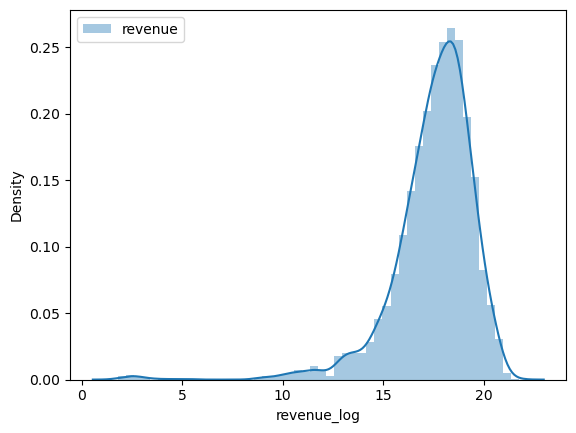

In [225]:
#데이터 정규화
#budget과 revenue가 너무 큰 값이라 로그 변환을 해 줌
df['revenue_log'] = np.log1p(df["revenue"])
df['budget_log'] = np.log1p(df["budget"])
df['popularity_log'] = np.log1p(df["popularity"])
df['vote_count_log'] = np.log1p(df["vote_count"])

#revenue_log값의 distplot그래프
sns.distplot(df["revenue_log"],label='revenue')
plt.legend()
plt.show()

In [226]:
from sklearn.model_selection import train_test_split

X = df[['budget', 'popularity', 'vote_count']]
y = df['revenue_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [227]:
#선형 회귀
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('### 선형 회귀 ###')
evaluate_regr(y_test, pred)

#릿지, 라쏘 회귀
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
r_pred = ridge_reg.predict(X_test)
print('### 릿지 회귀 ###')
evaluate_regr(y_test, r_pred)
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
l_pred = lasso_reg.predict(X_test)
print('### 라쏘 회귀 ###')
evaluate_regr(y_test, l_pred)


### 선형 회귀 ###
RMSE 값 :  1.5796773609916277
MAE 값 :  1.0790973144347868
### 릿지 회귀 ###
RMSE 값 :  1.5796773976389247
MAE 값 :  1.0790973490178355
### 라쏘 회귀 ###
RMSE 값 :  1.5796937082758313
MAE 값 :  1.0791124522232658


In [228]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
print('### 랜덤 포레스트 회귀 ###')
evaluate_regr(y_test, rf_pred)

gbm_reg.fit(X_train, y_train)
gbm_pred = gbm_reg.predict(X_test)
print('### GBM 회귀 ###')
evaluate_regr(y_test, gbm_pred)

xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print('### xgboost 회귀 ###')
evaluate_regr(y_test, xgb_pred)

lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)
print('### lightGBM 회귀 ###')
evaluate_regr(y_test, lgbm_pred)

### 랜덤 포레스트 회귀 ###
RMSE 값 :  1.4009194824250875
MAE 값 :  0.9131144296475225
### GBM 회귀 ###
RMSE 값 :  1.4795854160697248
MAE 값 :  0.9256572847663378
### xgboost 회귀 ###
RMSE 값 :  1.546376388117337
MAE 값 :  1.0228946903796194
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 721
[LightGBM] [Info] Number of data points in the train set: 2258, number of used features: 3
[LightGBM] [Info] Start training from score 17.494700
### lightGBM 회귀 ###
RMSE 값 :  1.541395669759506
MAE 값 :  0.9768140925150325
